In [51]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [52]:
# Import Data
ohioIMRates = pd.read_csv("Infant (Under 1)Mortality Rates by Ohio Counties.csv")

ohioIMRates.head()

,YEAR,COUNTY,DEATHS
0,2007,Adams,5
1,2008,Adams,1
2,2009,Adams,8
3,2010,Adams,2
4,2011,Adams,6


In [53]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = ohioIMRates[["YEAR","COUNTY"]]
y = ohioIMRates["DEATHS"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (1170, 2) (1170, 1)


In [54]:
data = X.copy()

ohioIMRates = pd.get_dummies(data,columns=["COUNTY"])
ohioIMRates.head()

,YEAR,COUNTY_Adams,COUNTY_Allen,COUNTY_Ashland,COUNTY_Ashtabula,COUNTY_Athens,COUNTY_Auglaize,COUNTY_Belmont,COUNTY_Brown,COUNTY_Butler,...,COUNTY_Union,COUNTY_Unknown,COUNTY_Van Wert,COUNTY_Vinton,COUNTY_Warren,COUNTY_Washington,COUNTY_Wayne,COUNTY_Williams,COUNTY_Wood,COUNTY_Wyandot
0,2007,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2009,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,YEAR,COUNTY_Adams,COUNTY_Allen,COUNTY_Ashland,COUNTY_Ashtabula,COUNTY_Athens,COUNTY_Auglaize,COUNTY_Belmont,COUNTY_Brown,COUNTY_Butler,...,COUNTY_Union,COUNTY_Unknown,COUNTY_Van Wert,COUNTY_Vinton,COUNTY_Warren,COUNTY_Washington,COUNTY_Wayne,COUNTY_Williams,COUNTY_Wood,COUNTY_Wyandot
723,2015,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1046,2013,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
429,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,2009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,2018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [57]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

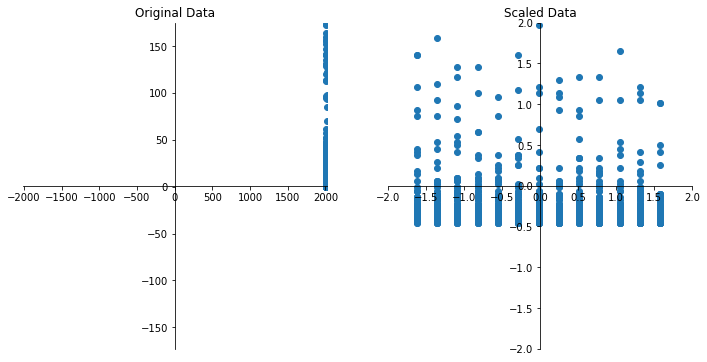

In [58]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["YEAR"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["YEAR"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [67]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

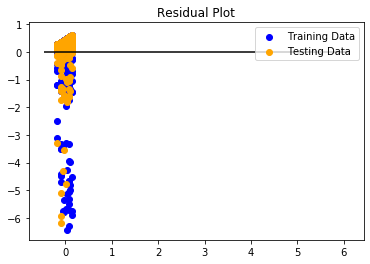

In [68]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7938621936393057, R2: -0.03811037202359424


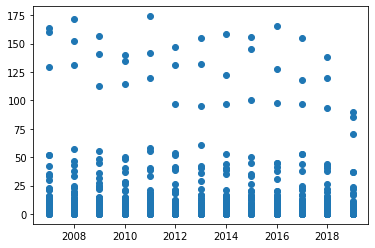

In [15]:
plt.scatter(X, y)

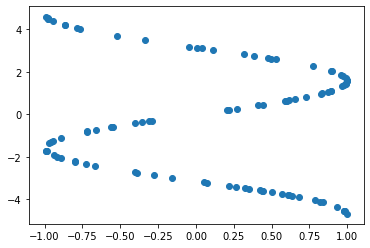

In [16]:
from sklearn.datasets import make_s_curve

data, color = make_s_curve(100, random_state=0)
plt.scatter(data[:,0], color)

In [8]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [13]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.0077933312197463476
Testing Score: -0.03237435151367718


Text(0.5, 1.0, 'Residual Plot')

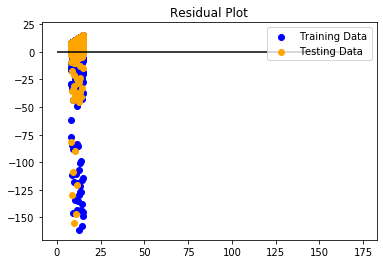

In [11]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [12]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 499.41532851563574
R-squared (R2 ): -0.03237435151367718


In [70]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[3.58457137e+12 3.81082445e+12 3.78661761e+12 3.50462382e+12
  3.66215861e+12 3.50462382e+12 3.63654903e+12 3.78661761e+12
  3.85858780e+12 3.83481316e+12 3.53154506e+12 3.76218842e+12
  3.78661761e+12]]
y-axis intercept:  [-0.00495763]


In [ ]:
# should also look into decision tree